# Workflow for processing LKG Multi-timeline

In [1]:
import numpy as np
import sys, os
sys.path.append("../SRC")

import time
start_time = time.time()

#
# Define corners of field data.
# Order is SE, SW, NE, NW. Units are decimal degrees.
#
Corners = [-35.09305166666667, 149.46134, -35.09225166666667, 149.46277833333335 ]
#
# Set up output directory
#
output = '../PNGS/LKG-MultiTimeLine/'

#
# field_data is in the format: 'Field Site Name', 'Date'
#
field_data = ['LKG', '26MAR18', '', 'Sentinel2a', 'UA_Panel', 'Radiance']

#
# CSV files with field site data (if available)
#
ls8_csvs = ['LKG_02JUL19__Landsat8.csv', 'LKG_15JAN19__Landsat8.csv', 'LKG_17SEP18__Landsat8.csv',
            'LKG_03MAY18__Landsat8.csv', 'LKG_04JUL18__Landsat8.csv', 'LKG_05APR18__Landsat8.csv',          
            'LKG_12FEB18_Site1_Landsat8.csv','LKG_25JAN19__Landsat8.csv', 'LKG_26MAR18__Landsat8.csv']

sent_csvs = ['LKG_02JUL19__Sentinel2.csv', 'LKG_15JAN19__Sentinel2.csv', 'LKG_17SEP18__Sentinel2.csv',
             'LKG_03MAY18__Sentinel2.csv', 'LKG_04JUL18__Sentinel2.csv', 'LKG_05APR18__Sentinel2.csv',
             'LKG_12FEB18_Site1_Sentinel2.csv', 'LKG_25JAN19__Sentinel2.csv', 'LKG_26MAR18__Sentinel2.csv']


#ls8_csvs = ['LKG_03MAY18__Landsat8.csv', 'LKG_04JUL18__Landsat8.csv', 'LKG_05APR18__Landsat8.csv',
#            'LKG_12FEB18_Site1_Landsat8.csv', 'LKG_22JUL18__Landsat8.csv', 'LKG_24JUL18__Landsat8.csv',
#            'LKG_17SEP18__Landsat8.csv', 'LKG_26MAR18__Landsat8.csv']

#sent_csvs = ['LKG_03MAY18__Sentinel2.csv', 'LKG_04JUL18__Sentinel2.csv', 'LKG_05APR18__Sentinel2.csv',
#             'LKG_12FEB18_Site1_Sentinel2.csv', 'LKG_22JUL18__Sentinel2.csv', 'LKG_24JUL18__Sentinel2.csv',
#             'LKG_17SEP18__Sentinel2.csv', 'LKG_26MAR18__Sentinel2.csv']#,

#
# plot_scale defines the extent of the axes in the final two plots in the workflow.
# A scale from 0-1 means no reflectance to perfect reflectance. Typically, dark sites
# will range from 0-0.3, whereas bright sites will be between 0-1.
#
plot_scale = [0.0, 0.6, 0.0, 0.6]

In [2]:
import shutil

import matplotlib.pyplot as plt
import matplotlib

import datacube

from Site_Pipelines import *
from Multi_TimeLine import *

#
# Use notebook format (allows inline zooming and moving of figures)
# Set default font size for all plots
#
%matplotlib inline
matplotlib.rcParams.update({'font.size': 11})
matplotlib.rcParams['savefig.dpi'] = 300

#
# Remove old files in directory and create a new one
#
directory = os.path.dirname(output)
if os.path.exists(directory):
    shutil.rmtree(directory)
os.makedirs(directory)

In [3]:
#
# Use coordinates to source data on nearest operational rain gauge from the BoM
#
rain_dat = GetRainData.get_rain_data(Corners[0], Corners[1])

Nearest Rain Gauge Station -  22.00 km away

-------------------------------------------

         ID      Lat       Lon                             Name
5496  70342 -35.1913  149.6598  LOWER BORO (ANNWYN)            


In [4]:
#
# Colours used for plotting multi-coloured Lines
#
colpac=['#770000', '#FF0000', '#FF7700', '#FFFF00', '#77FF00', '#00FF00', 
        '#00FF77', '#00FFFF', '#0077FF', '#0000FF', '#000077', '#FF00FF', '#777777', '#770077', '#777700']

#
# Start Figure numbering at 1
#
fignum = 1

### Create DataFrames with GPS locations

In [5]:
import pandas as pd

def mkdf(Corners):
    temploc = pd.DataFrame([Corners[::2], Corners[1::2]], index=['Latitude', 'Longitude'])
    location = temploc.T.copy()
    return location

location = mkdf(Corners)

### Query Satellite data

Retrieve xarrays for satellite data, based on which satellite, query area and time.<BR>
sat_array will contain all band data<BR>
sat_bigarray will be a larger version of sat_array, which can be used for context plotting.

In [6]:
ldc, sdc, lquery, squery, lquery2, squery2 = LongQuery.make_long_query(location)

ls8_array, s2a_array, s2b_array, ls8_bigarray, s2a_bigarray, s2b_bigarray = CreateLongArrays.create_long_arrays_nomask(ldc, sdc, lquery, squery, lquery2, squery2)

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/public/modules/dea/20201217/lib/python3.6/site-packages/datacube/model/__init__.py:234: DeprecationWarning: Using zone/datum to specify CRS is deprecated
  category=DeprecationWarning)
/g/data/v10/pub

# Figure 

### Plot large-area context RGB array for Satellite data

Landsat 8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


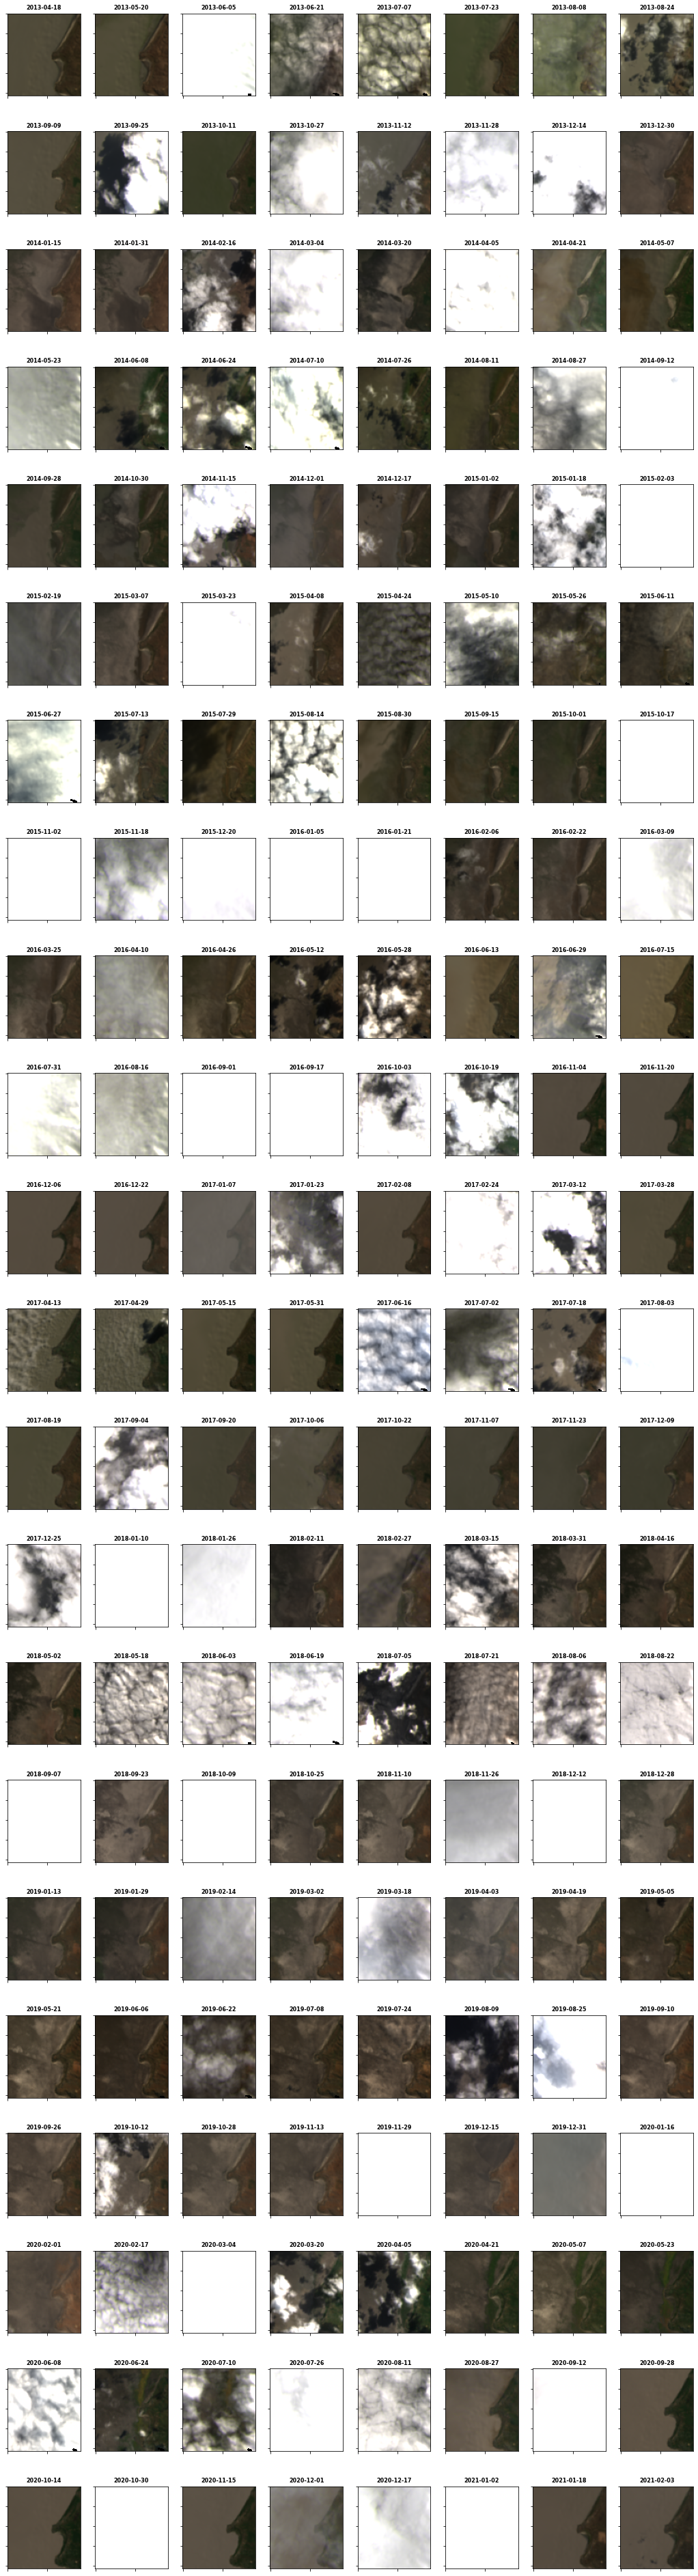

In [7]:
FIG_ManyLS8RGB.FIG_many_LS8RGB(ls8_bigarray, output, field_data, fignum)
fignum += 1

Sentinel 2a


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

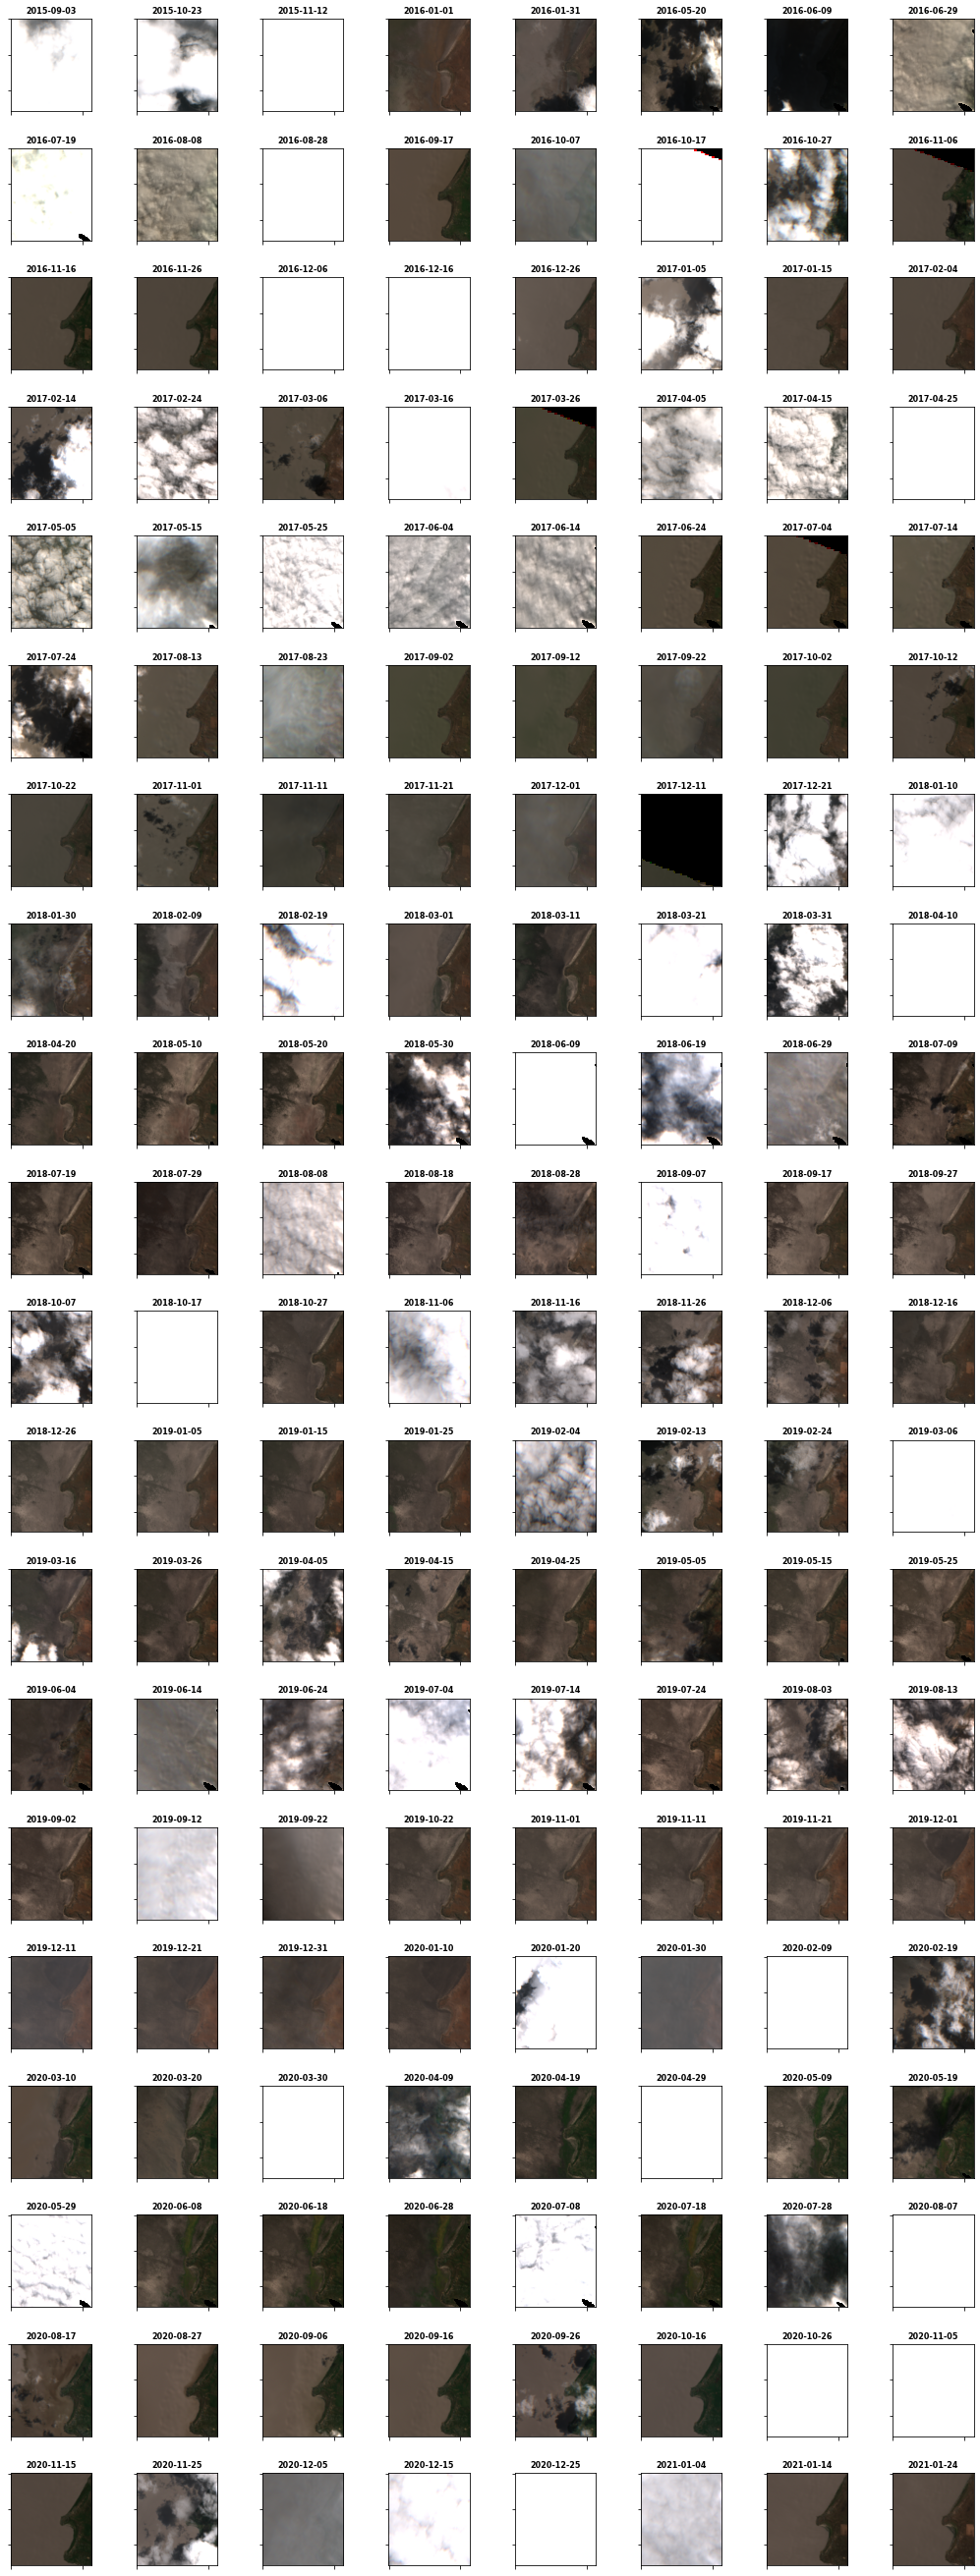

In [8]:
FIG_ManyS2ARGB.FIG_many_S2ARGB(s2a_bigarray, output, field_data, fignum)
fignum += 1

Sentinel 2b


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

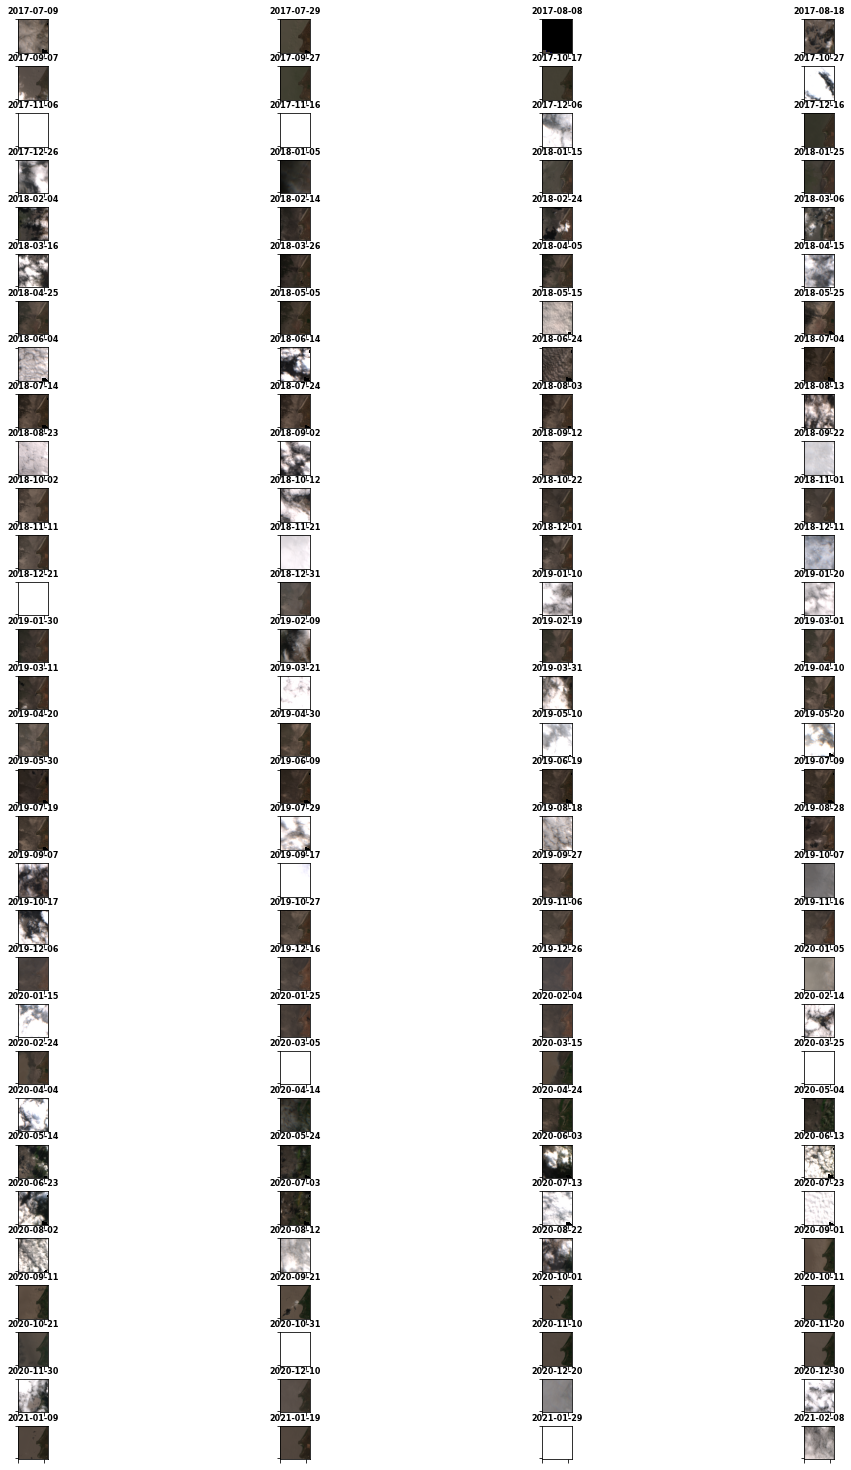

In [9]:
FIG_ManyS2BRGB.FIG_many_S2BRGB(s2b_bigarray, output, field_data, fignum)
fignum += 1

### Mask out clouds, based on thresholding

In [10]:
ls8_daylist = CloudMask.cloud_mask(ls8_array, ls8_bigarray, 'LS8')
s2a_daylist = CloudMask.cloud_mask(s2a_array, s2a_bigarray, 'S2A')
s2b_daylist = CloudMask.cloud_mask(s2b_array, s2b_bigarray, 'S2B')

/g/data/v10/public/modules/dea-env/20200713/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/g/data/v10/public/modules/dea-env/20200713/lib/python3.6/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


Coarse threshold finds this many bad days: 96
Fine threshold finds this many bad days: 11
Coarse threshold finds this many bad days: 98
Fine threshold finds this many bad days: 3
Removed  2017-12-11 as there are no good data over the field site for this day


/g/data/v10/public/modules/dea-env/20200713/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Coarse threshold finds this many bad days: 73
Fine threshold finds this many bad days: 2
Removed  2017-08-08 as there are no good data over the field site for this day


### Create a statistics dataframe for satellite data

In [11]:
fls8_df, fs2a_df, fs2b_df = CreateManyStats.create_manystats(ls8_array, s2a_array, s2b_array, ls8_daylist, s2a_daylist, s2b_daylist, 'dummy', 'dummy', field_data)

# Figure

### Plot comparison spectra of satellite and field data, on a pixel-by-pixel basis

Error bars are shown for the satellite and field data, based on the standard deviation of the pixels
within the field. The black line shows the satellite data, which has been averaged over all pixels that satisfy the Datacube query ie. all pixels shown in Figure 11. The orange line shows satellite data which has been averaged over only those pixels that overlap with at least one field measurement.

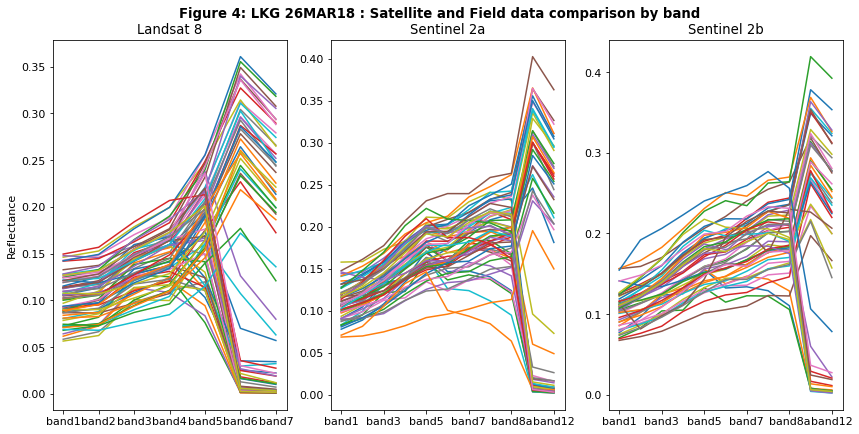

In [12]:
FIG_ManySatFieldBands.FIG_many_sat_field_bands(ls8_array, s2a_array, s2b_array, fls8_df, fs2a_df, fs2b_df, output, field_data, fignum)
fignum += 1

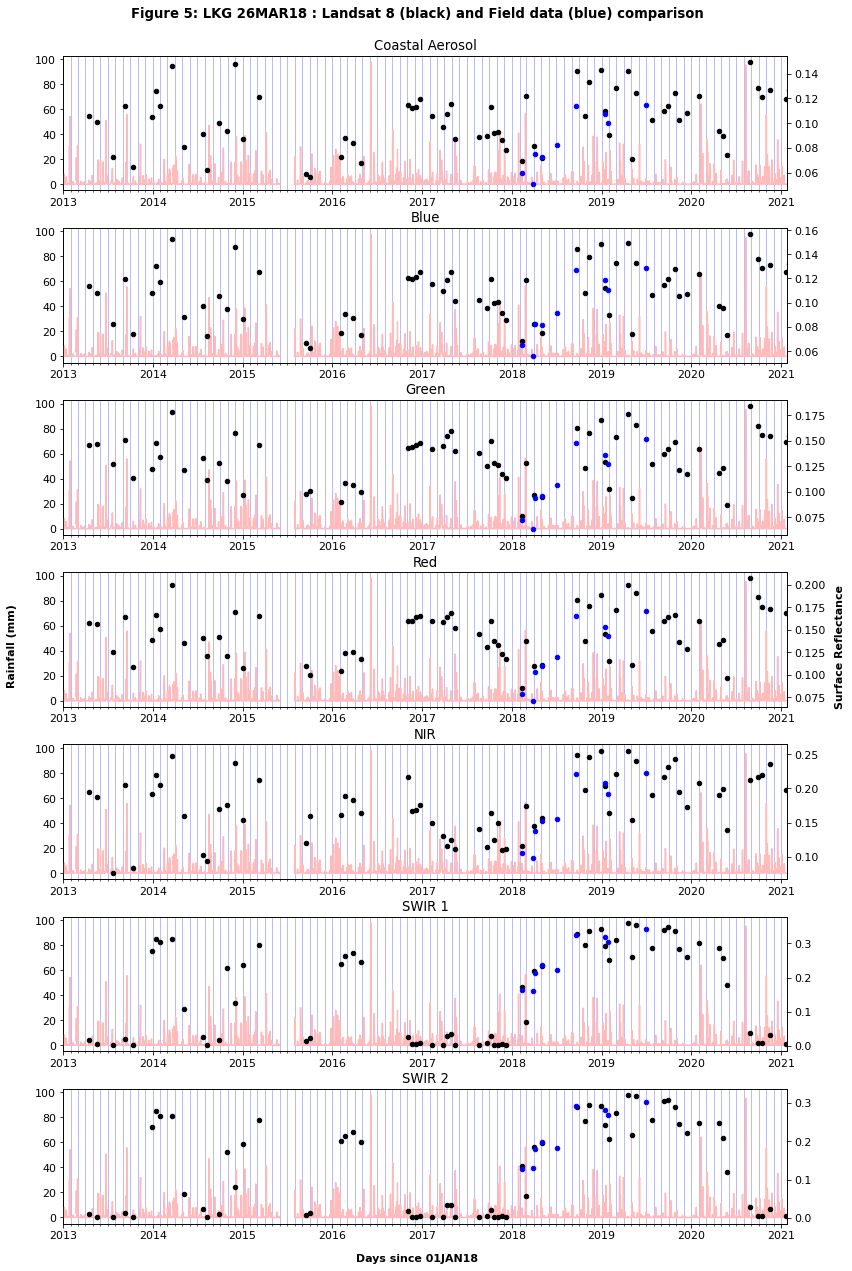

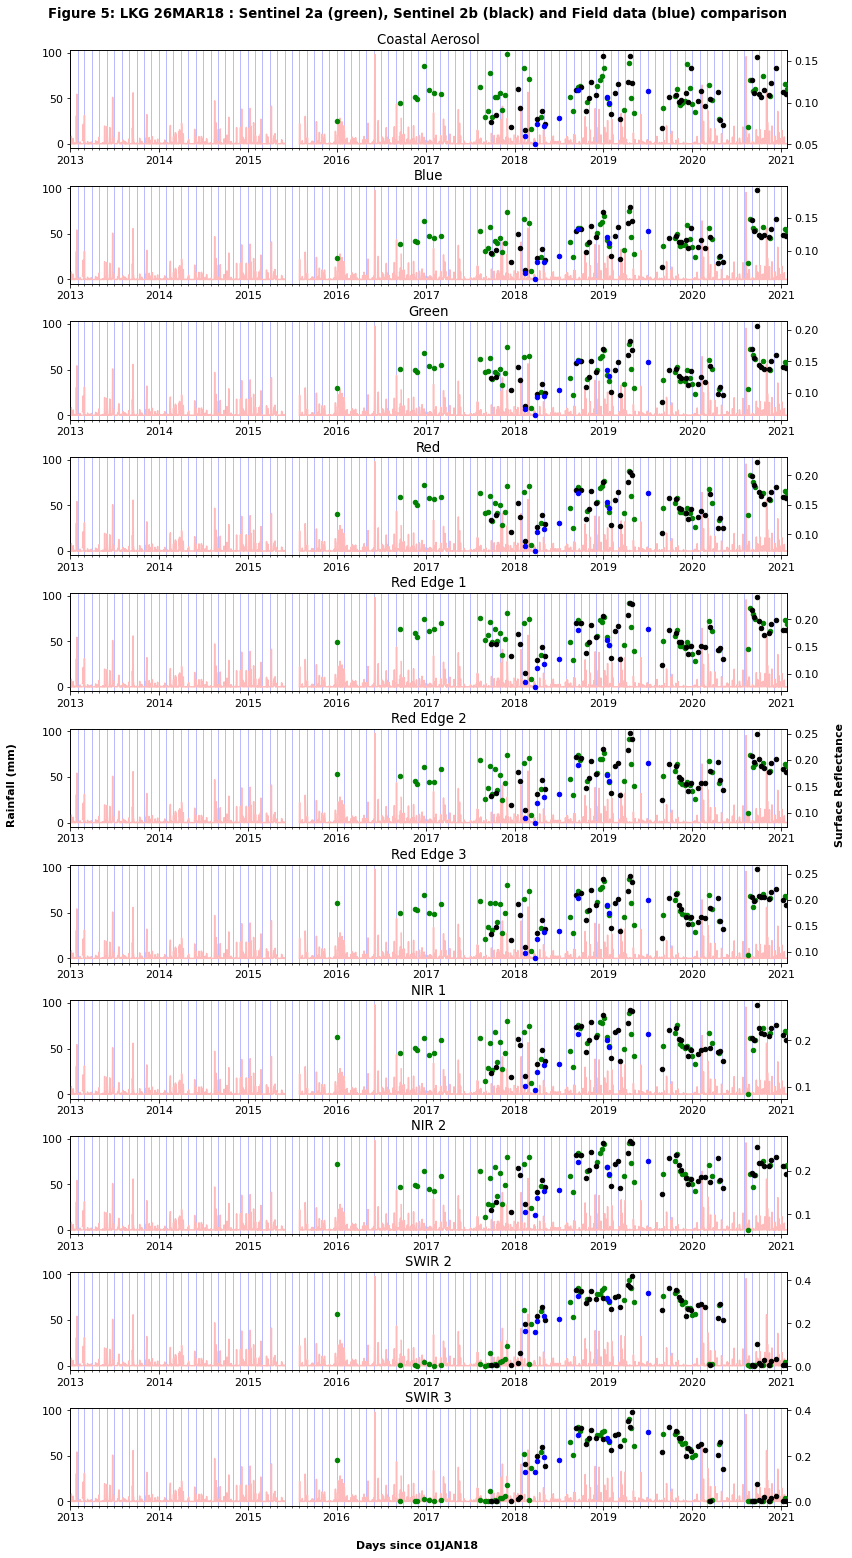

In [13]:
FIG_MultiTimeLine.FIG_multi_time_line(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)
fignum+=1

## How long did this notebook take to run?

In [14]:
import datetime
print("This Notebook took ", str(datetime.timedelta(seconds=int((time.time() - start_time)))), "(h:m:s) to run")

This Notebook took  0:28:45 (h:m:s) to run
